In [10]:
import vaex
import numpy as np
from glob import glob
from time import time
from os.path import join, abspath
from os import pardir, mkdir
import sys
from matplotlib import pyplot as plt

In [41]:
# import utils
util_dir = abspath(pardir)
sys.path.insert(0, util_dir)

from utils import progressbar

In [3]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [4]:
name = "Best-Pars"
data_dir = join(root_data_dir, name)
try:
  mkdir(data_dir)
  print(f"Creating {name} dir in Data dir")
except FileExistsError:
  print("Directory already exist. Good to go!")
data_dir

Directory already exist. Good to go!


'/home2/s20321005/Thesis-Project/Data/Best-Pars'

In [6]:
name = "rave-galah-lamost-apogee"
combine_data_dir = join(root_data_dir, 'Combine', name)
combine_data_dir

'/home2/s20321005/Thesis-Project/Data/Combine/rave-galah-lamost-apogee'

In [12]:
files = glob(join(combine_data_dir, "*.hdf5"))
files.sort()
data = vaex.open_many(files)
data

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,rv_galah,e_rv_galah,feh_galah,alphafe_galah,teff_galah,e_teff_galah,logg_galah,e_logg_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0.000464,-84.272873,12.869,12.374,4617686126396602368,3.6212091,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,14.117249,14.546528,13.5242605,20.115417,3.325204,304.44429715164756,-32.70355447144384,5658.605,5653.9224,5668.203,4.2226,4.2043,4.2496,-0.0402,-0.0457,-0.0316,770.2898,746.2748,786.9589,0.2956,0.2926,0.2995,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.001998,-84.804314,12.523,11.93,4617598371624860928,17.00417,16.266358206309686,0.015283653,4.954528511167747,0.016042866,0.686194890423576,0.013194535,14.117252,14.645076,13.433549,-23.821648,3.2447915,304.29624940743884,-32.18708166475209,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.002857,-84.718956,11.746,10.877,4617602769671367936,5.9807105,5.927853781783437,0.014620288,-0.7933771944304462,0.01440706,0.17823265910718195,0.011743693,13.724135,14.456079,12.896074,131.92238,1.2741442,304.31980747322217,-32.26998931504778,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.004052,-82.750267,13.333,12.872,4630074530064792448,11.209091,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,14.624002,15.035072,14.034426,-43.84897,5.5962825,304.8768564308389,-34.1827911363649,6107.482,6101.212,6117.21,4.2386,4.2239,4.2526,-0.8342,-0.8443,-0.8225,911.0151,895.5346,927.2803,0.619,0.6154,0.624,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0.007844,-82.031616,12.605,12.209,4630918748836674432,18.801056,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,13.798758,14.187072,13.238532,-27.08683,4.7260613,305.0858976745071,-34.88045519689782,5503.932,5470.177,5528.491,4.1392,4.1308,4.148,-0.7153,-0.7508,-0.6893,856.8555,845.9437,867.5156,0.1912,0.1723,0.2052,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"27,001,405",359.991162,81.723877,11.903,11.228,22

In [9]:
print(data.column_names)

['ra', 'dec', 'Jmag', 'Kmag', 'source_id', 'pm', 'pmra', 'e_pmra', 'pmdec', 'e_pmdec', 'parallax', 'e_parallax', 'gmag', 'bpmag', 'rpmag', 'rv_gaia', 'e_rv_gaia', 'GLON', 'GLAT', 'teff_gspphot', 'teff_gspphot_lower', 'teff_gspphot_upper', 'logg_gspphot', 'logg_gspphot_lower', 'logg_gspphot_upper', 'mh_gspphot', 'mh_gspphot_lower', 'mh_gspphot_upper', 'distance_gspphot', 'distance_gspphot_lower', 'distance_gspphot_upper', 'ag_gspphot', 'ag_gspphot_lower', 'ag_gspphot_upper', 'mh_gspspec', 'mh_gspspec_lower', 'mh_gspspec_upper', 'alphafe_gspspec', 'alphafe_gspspec_lower', 'alphafe_gspspec_upper', 'fem_gspspec', 'fem_gspspec_lower', 'fem_gspspec_upper', 'spectraltype_esphs', 'rv_rave', 'e_rv_rave', 'teff_rave', 'logg_rave', 'mh_rave', 'alphafe_rave', 'rv_galah', 'e_rv_galah', 'feh_galah', 'alphafe_galah', 'teff_galah', 'e_teff_galah', 'logg_galah', 'e_logg_galah', 'subclass_lamost', 'teff_lamost', 'e_teff_lamost', 'logg_lamost', 'e_logg_lamost', 'feh_lamost', 'e_feh_lamost', 'rv_lamost', 

In [13]:
# cols initiation
rv_cols = [
    {
        'value': 'rv_gaia', 
        'error': 'e_rv_gaia', 
        'cat': 'gaia'
    }, 
    {
        'value': 'rv_rave', 
        'error': 'e_rv_rave', 
        'cat': 'rave'
    },
    {
        'value': 'rv_apogee', 
        'error': 'e_rv_apogee', 
        'cat': 'apogee'
    },
    {
        'value': 'rv_lamost', 
        'error': 'e_rv_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'rv_galah', 
        'error': 'e_rv_galah', 
        'cat': 'galah'
    }
]

teff_cols = [
    {
        'value': 'teff_gspphot', 
        'error': {
            'upper': 'teff_gspphot_upper',
            'lower': 'teff_gspphot_lower'
        }, 
        'cat': 'gspphot'
    }, 
    {
        'value': 'teff_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'teff_apogee', 
        'error': 'e_teff_apogee', 
        'cat': 'apogee'
    },
    {
        'value': 'teff_lamost', 
        'error': 'e_teff_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'teff_galah', 
        'error': 'e_teff_galah', 
        'cat': 'galah'
    }
]

logg_cols = [
    {
        'value': 'logg_gspphot', 
        'error': {
            'upper': 'logg_gspphot_upper',
            'lower': 'logg_gspphot_lower'
        }, 
        'cat': 'gspphot'
    }, 
    {
        'value': 'logg_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'logg_apogee', 
        'error': 'e_logg_apogee', 
        'cat': 'apogee'
    },
    {
        'value': 'logg_lamost', 
        'error': 'e_logg_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'logg_galah', 
        'error': 'e_logg_galah', 
        'cat': 'galah'
    }
]

mh_cols = [
    {
        'value': 'mh_gspphot', 
        'error': {
            'upper': 'mh_gspphot_upper',
            'lower': 'mh_gspphot_lower'
        }, 
        'cat': 'gspphot'
    },
    {
        'value': 'mh_gspspec', 
        'error': {
            'upper': 'mh_gspspec_upper',
            'lower': 'mh_gspspec_lower'
        }, 
        'cat': 'gspspec'
    },
    {
        'value': 'mh_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'mh_apogee', 
        'error': 'e_mh_apogee', 
        'cat': 'apogee'
    }
]

alphafe_cols = [
    {
        'value': 'alphafe_gspspec', 
        'error': {
            'upper': 'alphafe_gspspec_upper',
            'lower': 'alphafe_gspspec_lower'
        }, 
        'cat': 'gspspec'
    },
    {
        'value': 'alphafe_rave', 
        'error': np.nan, 
        'cat': 'rave'
    },
    {
        'value': 'alphafe_galah', 
        'error': np.nan, 
        'cat': 'galah'
    }
]

fem_cols = [
    {
        'value': 'fem_gspspec', 
        'error': {
            'upper': 'fem_gspspec_upper',
            'lower': 'fem_gspspec_lower'
        }, 
        'cat': 'gspspec'
    }
]

feh_cols = [
    {
        'value': 'feh_galah', 
        'error': np.nan, 
        'cat': 'galah'
    },
    {
        'value': 'feh_lamost', 
        'error': 'e_feh_lamost', 
        'cat': 'lamost'
    },
    {
        'value': 'feh_apogee', 
        'error': 'e_feh_apogee', 
        'cat': 'apogee'
    }
]

In [27]:
# Extract which columns should be used

# par_cols: {
#   value: string
#   error?: {
#     upper: string
#     lower: string
#   } | string
#   cat: string
# }[]
# row: pandas.core.series.Series
def extract_pars(par_cols, row):
    pars = []
    for col in par_cols:
        par = {}
        if np.isnan(row[col['value']]):
            continue
        par['value'] = row[col['value']]
        if type(col['error']) == dict:
            if ('lower' not in col['error']) or ('upper' not in col['error']):
                raise TypeError('lower and/or upper does not exist in error dict')
            par['error'] = {'lower': par['value'] - row[col['error']['lower']] , 'upper': row[col['error']['upper']] - par['value']}
        elif (type(col['error']) == str):
            par['error'] = {'lower': row[col['error']], 'upper': row[col['error']]}
        else:
            par['error'] = {'lower': np.nan, 'upper': np.nan}
        par['cat'] = col['cat']
        pars.append(par)
    return np.array(pars)

In [34]:
# function to select the BEST parameter, not optimized tho, but works

# TypeScript-like style type definitions
# Input
## pars: {
##   value: number
##   error: {
##     lower: number
##     upper: number
##   } | number // upper and lower error OR just singgle number
##   cat: string // catalog name
## }[] // parameter values
## index: number // row index

# Output: Array
## par: {
##   value: number
##   error: {
##     lower: number
##     upper: number
##   } // best upper and lower error
##   symmetric: boolean // if lower == upper
##   cat: string // best catalog name
## }

NaN = {'value': np.nan, 'error': {'lower': np.nan, 'upper': np.nan}, 'symmetric': np.nan , 'cat': np.nan}

def select_best(pars):
    if len(pars) == 0: return NaN
    elif len(pars) == 1:
        if (type(pars[0]['error']) == dict) and ('lower' in pars[0]['error']) and ('upper' in pars[0]['error']):
            if np.isnan(pars[0]['error']['lower']):
                pars[0]['symmetric'] = np.nan
            else:
                pars[0]['symmetric'] = pars[0]['error']['lower'] == pars[0]['error']['upper']
        else:
            raise TypeError('error is not a dict')
        # elif np.isnan(pars[0]['error']):
        #     pars[0]['symmetric'] = np.nan
        # elif (type(pars[0]['error']) == float) or (type(pars[0]['error']) == int):
        #     pars[0]['symmetric'] = True
        # if np.isnan(pars[0]['value']):
        #     pars[0] = NaN
        return pars[0]
    else:
        mask = []
        for i, par in enumerate(pars):
            if (type(par['error']) == dict) and ('lower' in par['error']) or ('upper' in par['error']): 
                mask.append(par['error']['lower'] > 0 and par['error']['upper'] > 0)
            else:
                raise TypeError('error is not a dict')
        pars = pars[mask]
        errors = np.array(list(map(lambda x: (x['error']['lower'] + x['error']['upper'])/2, pars)))
        values = np.array(list(map(lambda x: x['value'], pars)))
        if len(pars) == 0: return NaN
        elif len(pars) == 1:
            pars[0]['symmetric'] = pars[0]['error']['lower'] == pars[0]['error']['upper']
            return pars[0]
        elif len(pars) == 2:
            i = np.argmin(errors)
            pars[i]['symmetric'] = pars[i]['error']['lower'] == pars[i]['error']['upper']
            return pars[i]
        else:
            avg = np.average(values, weights=1/errors)
            selected_pars = []
            for par in pars:
                if (par['value'] + par['error']['upper'] > avg) and (par['value'] - par['error']['lower'] < avg):
                    selected_pars.append(par)
            if (len(selected_pars) == 0):
                i = np.argmin(errors)
                pars[i]['symmetric'] = pars[i]['error']['lower'] == pars[i]['error']['upper']
                return pars[i]
            else:
                errors = np.array(list(map(lambda x: (x['error']['lower'] + x['error']['upper'])/2, selected_pars)))
                i = np.argmin(errors)
                selected_pars[i]['symmetric'] = selected_pars[i]['error']['lower'] == selected_pars[i]['error']['upper']
                return selected_pars[i]

In [37]:
remove_cols = ['rv_gaia', 'e_rv_gaia', 'teff_gspphot', 'teff_gspphot_lower', 'teff_gspphot_upper', 
               'logg_gspphot', 'logg_gspphot_lower', 'logg_gspphot_upper', 'mh_gspphot', 
               'mh_gspphot_lower', 'mh_gspphot_upper',  
               'mh_gspspec', 'mh_gspspec_lower', 'mh_gspspec_upper', 'alphafe_gspspec', 'alphafe_gspspec_lower', 
               'alphafe_gspspec_upper', 'fem_gspspec', 'fem_gspspec_lower', 'fem_gspspec_upper',  'rv_rave', 
               'e_rv_rave', 'teff_rave', 'logg_rave', 'mh_rave', 'alphafe_rave', 'rv_galah', 'e_rv_galah', 
               'feh_galah', 'alphafe_galah', 'teff_galah', 'e_teff_galah', 'logg_galah', 'e_logg_galah', 
               'teff_lamost', 'e_teff_lamost', 'logg_lamost', 'e_logg_lamost', 'feh_lamost', 'e_feh_lamost', 
               'rv_lamost', 'e_rv_lamost', 'alpham_lamost', 'e_alpham_lamost', 'rv_apogee', 'e_rv_apogee', 
               'teff_apogee', 'e_teff_apogee', 'logg_apogee', 'e_logg_apogee', 'mh_apogee', 'e_mh_apogee', 
               'alpham_apogee', 'e_alpham_apogee', 'feh_apogee', 'e_feh_apogee']

In [47]:
from time import time
def progressbar(percent=0, width=50, info="", path="", flush=False) -> None:
    left = int((width * percent) // 100)
    right = width - left
    
    tags = "#" * left
    spaces = " " * right
    percents = f"{percent:.0f}%"
    text = f"\r[{tags}{spaces}] {percents} {info}"
    if(flush):
        print(text, end="", flush=True)
    else:
        print(text)
    if(path != ""):
        with open(path, 'a') as f:
            f.write(f"{text}")

In [1]:
for file in files:
    df_vaex = vaex.open(file)
    rvs = []
    teffs = []
    loggs = []
    mhs = []
    alphafes = []
    fems = []
    fehs = []
    t0 = time()
    df = df_vaex.to_pandas_df()
    for index, row in df.iterrows():
        # rv
        rv = extract_pars(rv_cols, row)
        rv_best = select_best(rv)
        rvs.append(rv_best)
        # teff
        teff = extract_pars(teff_cols, row)
        teff_best = select_best(teff)
        teffs.append(teff_best)
        # logg
        logg = extract_pars(logg_cols, row)
        logg_best = select_best(logg)
        loggs.append(logg_best)
        # mh
        mh = extract_pars(mh_cols, row)
        mh_best = select_best(mh)
        mhs.append(mh_best)
        # alphafe
        alphafe = extract_pars(alphafe_cols, row)
        alphafe_best = select_best(alphafe)
        alphafes.append(alphafe_best)
        # fem
        fem = extract_pars(fem_cols, row)
        fem_best = select_best(fem)
        fems.append(fem_best)
        # feh
        feh = extract_pars(feh_cols, row)
        feh_best = select_best(feh)
        fehs.append(feh_best)
        t1 = time()
        progressbar((index+1)/(len(df))*100, flush=True, info=f"{index}/{len(df)} - {np.round(t1-t0, 3)}s - {file.split('/')[-1]}")
    df['rv'] = list(map(lambda x: x['value'], rvs))
    df['e_rv'] = list(map(lambda x: x['error']['lower'], rvs))
    df['rv_cat'] = list(map(lambda x: x['cat'], rvs))
    # teff   
    df['teff'] = list(map(lambda x: x['value'], teffs))
    df['e_teff_lower'] = list(map(lambda x: x['error']['lower'], teffs))
    df['e_teff_upper'] = list(map(lambda x: x['error']['upper'], teffs))
    df['teff_symmetric'] = np.array(list(map(lambda x: x['symmetric'], teffs)))
    df['teff_cat'] = list(map(lambda x: x['cat'], teffs))
    # logg
    df['logg'] = list(map(lambda x: x['value'], loggs))
    df['e_logg_lower'] = list(map(lambda x: x['error']['lower'], loggs))
    df['e_logg_upper'] = list(map(lambda x: x['error']['upper'], loggs))
    df['logg_symmetric'] = np.array(list(map(lambda x: x['symmetric'], loggs)))
    df['logg_cat'] = list(map(lambda x: x['cat'], loggs))
    # mh
    df['mh'] = list(map(lambda x: x['value'], mhs))
    df['e_mh_lower'] = list(map(lambda x: x['error']['lower'], mhs))
    df['e_mh_upper'] = list(map(lambda x: x['error']['upper'], mhs))
    df['mh_symmetric'] = np.array(list(map(lambda x: x['symmetric'], mhs)))
    df['mh_cat'] = list(map(lambda x: x['cat'], mhs))
    # alphafe
    df['alphafe'] = list(map(lambda x: x['value'], alphafes))
    df['e_alphafe_lower'] = list(map(lambda x: x['error']['lower'], alphafes))
    df['e_alphafe_upper'] = list(map(lambda x: x['error']['upper'], alphafes))
    df['alphafe_symmetric'] = np.array(list(map(lambda x: x['symmetric'], alphafes)))
    df['alphafe_cat'] = list(map(lambda x: x['cat'], alphafes))
    # fem
    df['fem'] = list(map(lambda x: x['value'], fems))
    df['e_fem_lower'] = list(map(lambda x: x['error']['lower'], fems))
    df['e_fem_upper'] = list(map(lambda x: x['error']['upper'], fems))
    df['fem_symmetric'] = np.array(list(map(lambda x: x['symmetric'], fems)))
    df['fem_cat'] = list(map(lambda x: x['cat'], fems))
    # feh
    df['feh'] = list(map(lambda x: x['value'], fems))
    df['e_feh_lower'] = list(map(lambda x: x['error']['lower'], fehs))
    df['e_feh_upper'] = list(map(lambda x: x['error']['upper'], fehs))
    df['feh_symmetric'] = np.array(list(map(lambda x: x['symmetric'], fehs)))
    df['feh_cat'] = list(map(lambda x: x['cat'], fehs))
    df_vaex = vaex.from_pandas(df)
    df_vaex = df_vaex.drop(remove_cols)
    path = join(data_dir, file.split('/')[-1])
    df_vaex.export_hdf5(path, progress=True)
    print(f"Saving {path}")

### Preview

In [7]:
files = glob(join(data_dir, "gaia-*.hdf5"))
files.sort()
files[:5]

['/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Best-Pars/gaia-004-005.hdf5']

In [27]:
gaia = vaex.open_many(files)
gaia

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat
0,0.000464,-84.272873,12.869,12.374,4617686126396602368,3.6212091,-2.123925825256161,0.018093891,2.9329329266790864,0.015576468,1.2414398898080128,0.014017576,14.117249,14.546528,13.5242605,304.44429715164756,-32.70355447144384,770.2898,746.2748,786.9589,0.2956,0.2926,0.2995,G,--,20.11541748046875,3.3252038955688477,gaia,5658.60498046875,4.6826171875,9.59814453125,0.0,gspphot,4.222599983215332,0.01830005645751953,0.026999950408935547,0.0,gspphot,-0.04019999876618385,0.005499999970197678,0.00860000029206276,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
1,0.001998,-84.804314,12.523,11.93,4617598371624860928,17.00417,16.266358206309686,0.015283653,4.954528511167747,0.016042866,0.686194890423576,0.013194535,14.117252,14.645076,13.433549,304.29624940743884,-32.18708166475209,nan,nan,nan,nan,nan,nan,K,--,-23.82164764404297,3.2447915077209473,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
2,0.002857,-84.718956,11.746,10.877,4617602769671367936,5.9807105,5.927853781783437,0.014620288,-0.7933771944304462,0.01440706,0.17823265910718195,0.011743693,13.724135,14.456079,12.896074,304.31980747322217,-32.26998931504778,nan,nan,nan,nan,nan,nan,K,--,131.92237854003906,1.274144172668457,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
3,0.004052,-82.750267,13.333,12.872,4630074530064792448,11.209091,10.524865569146224,0.019602386,3.856285092898922,0.02012978,1.027615140072866,0.01769279,14.624002,15.035072,14.034426,304.8768564308389,-34.1827911363649,911.0151,895.5346,927.2803,0.619,0.6154,0.624,G,--,-43.848968505859375,5.596282482147217,gaia,6107.48193359375,6.27001953125,9.72802734375,0.0,gspphot,4.23859977722168,0.014699935913085938,0.014000415802001953,0.0,gspphot,-0.8342000246047974,0.010099947452545166,0.011700034141540527,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
4,0.007844,-82.031616,12.605,12.209,4630918748836674432,18.801056,18.300275763425613,0.016882967,-4.310403819421376,0.018285993,1.1269417803187838,0.013919161,13.798758,14.187072,13.238532,305.0858976745071,-34.88045519689782,856.8555,845.9437,867.5156,0.1912,0.1723,0.2052,F,--,-27.086830139160156,4.7260613441467285,gaia,5503.93212890625,33.75537109375,24.55908203125,0.0,gspphot,4.139200210571289,0.008400440216064453,0.008799552917480469,0.0,gspphot,-0.7153000235557556,0.03549998998641968,0.026000022888183594,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"27,001,405",359.991162,81.723877,11.903,11.228,2286403269975358080,5.2602525,5.127952329131903,0.016783616,-1.172331463561274,0.016823703,0.45434838996692956,0.014370571,13.8628235,14.56874,13.046526,120.98842984113523,19.046996592015013,nan,nan,nan,nan,nan,nan,K,--,-14.393659591674805,2.2139320373535156,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--
"27,001,406",359.992311,86.652588,13.491,13.03,2301267842548323584,9.127414,8.573259109347845,0.023041524,3.1319166932358895,0.024572177,1.3792355955819116,0.021768766,14.949071,15.4501915,1

#### rv

In [53]:
df_rv_nan = gaia[gaia.rv.isnan()]
none = len(df_rv_nan)

df_rv = gaia.groupby('rv_cat', agg={'count': vaex.agg.count('rv_cat')})
df_rv = df_rv.to_pandas_df()
df_rv.at[0, 'count'] = none
df_rv.sort_values(by='rv_cat', ascending=True, inplace=True)
df_rv

None: 4535451


,rv_cat,count
2,apogee,309517
5,gaia,21336408
1,galah,341435
4,lamost,446035
3,rave,32564
0,None,4535451


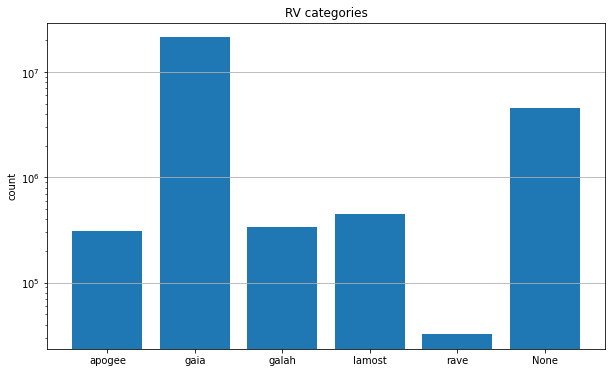

In [54]:
x = df_rv['rv_cat'].values.astype(str)
y = df_rv['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('RV categories')
ax.yaxis.grid(True)
plt.show()

#### teff

In [55]:
df_teff_nan = gaia[gaia.teff.isnan()]
none = len(df_teff_nan)

df_teff = gaia.groupby('teff_cat', agg={'count': vaex.agg.count('teff_cat')})
df_teff = df_teff.to_pandas_df()
df_teff.at[0, 'count'] = none
df_teff.sort_values(by='teff_cat', ascending=True, inplace=True)
df_teff

None: 5285335


,teff_cat,count
2,apogee,193399
1,galah,100084
3,gspphot,20823162
5,lamost,470314
4,rave,129116
0,None,5285335


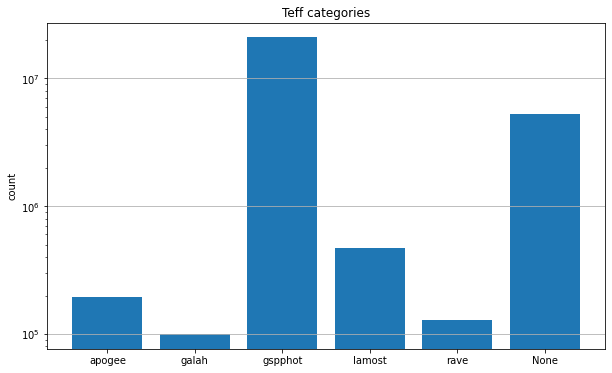

In [56]:
x = df_teff['teff_cat'].values.astype(str)
y = df_teff['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('Teff categories')
ax.yaxis.grid(True)
plt.show()

#### logg

In [58]:
df_logg_nan = gaia[gaia.logg.isnan()]
none = len(df_logg_nan)

df_logg = gaia.groupby('logg_cat', agg={'count': vaex.agg.count('logg_cat')})
df_logg = df_logg.to_pandas_df()
df_logg.at[0, 'count'] = none
df_logg.sort_values(by='logg_cat', ascending=True, inplace=True)
df_logg

,logg_cat,count
2,apogee,173968
1,galah,101335
3,gspphot,20957054
5,lamost,354593
4,rave,129116
0,None,5285344


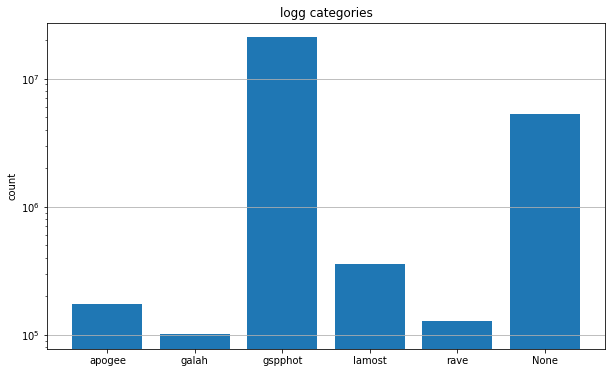

In [59]:
x = df_logg['logg_cat'].values.astype(str)
y = df_logg['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('logg categories')
ax.yaxis.grid(True)
plt.show()

#### feh

In [60]:
df_feh_nan = gaia[gaia.feh.isnan()]
none = len(df_feh_nan)

df_feh = gaia.groupby('feh_cat', agg={'count': vaex.agg.count('feh_cat')})
df_feh = df_feh.to_pandas_df()
df_feh.at[0, 'count'] = none
df_feh.sort_values(by='feh_cat', ascending=True, inplace=True)
df_feh

,feh_cat,count
2,apogee,360809
1,galah,337593
3,lamost,1483578
0,None,25600841


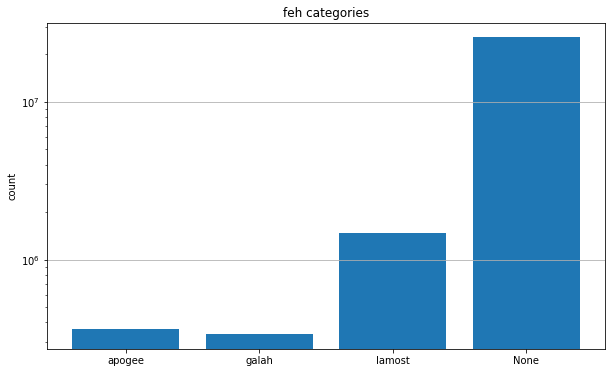

In [61]:
x = df_feh['feh_cat'].values.astype(str)
y = df_feh['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('feh categories')
ax.yaxis.grid(True)
plt.show()

#### mh

In [62]:
df_mh_nan = gaia[gaia.mh.isnan()]
none = len(df_mh_nan)

df_mh = gaia.groupby('mh_cat', agg={'count': vaex.agg.count('mh_cat')})
df_mh = df_mh.to_pandas_df()
df_mh.at[0, 'count'] = none
df_mh.sort_values(by='mh_cat', ascending=True, inplace=True)
df_mh

,mh_cat,count
2,apogee,217944
3,gspphot,20952974
1,gspspec,1752177
4,rave,9370
0,None,4068945


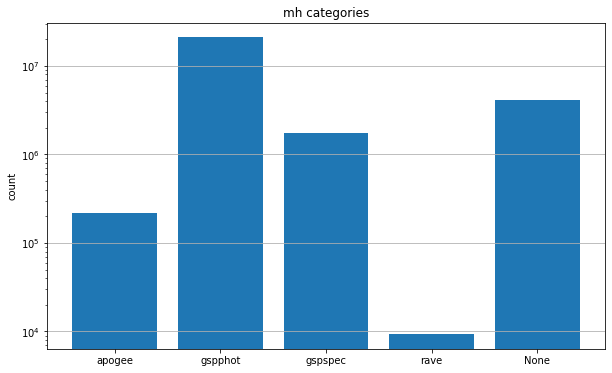

In [63]:
x = df_mh['mh_cat'].values.astype(str)
y = df_mh['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('mh categories')
ax.yaxis.grid(True)
plt.show()


#### alpha

In [64]:
df_alpha_nan = gaia[gaia.alphafe.isnan()]
none = len(df_alpha_nan)

df_alpha = gaia.groupby('alphafe_cat', agg={'count': vaex.agg.count('alphafe_cat')})
df_alpha = df_alpha.to_pandas_df()
df_alpha.at[0, 'count'] = none
df_alpha.sort_values(by='alphafe_cat', ascending=True, inplace=True)
df_alpha

,alphafe_cat,count
1,galah,238282
2,gspspec,3859117
3,rave,50194
0,None,22853817


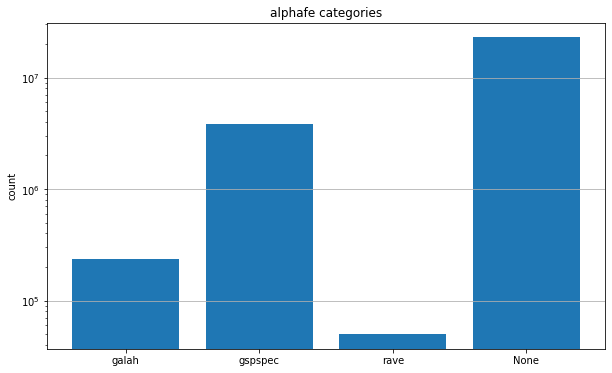

In [65]:
x = df_alpha['alphafe_cat'].values.astype(str)
y = df_alpha['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('alphafe categories')
ax.yaxis.grid(True)
plt.show()